(3145728, 3)
229
Processing time:  0.1329936981201172
GPU Processing time:  0.12264299392700195


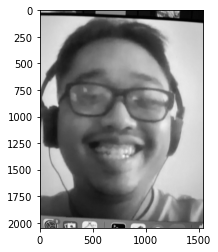

In [ ]:
# import os
# os.environ["NUMBA_ENABLE_CUDASIM"] = "0" 
# os.environ["NUMBA_CUDA_DEBUGINFO"] = "0"
import numba
from numba import cuda
import cv2
import matplotlib
import numpy as np
import time

img = matplotlib.image.imread('test.jpg')
# img = img[::5, ::5]
image = (img[:, :, :3] ).astype('uint8')


imageWidth = image.shape[1]
imageHeight= image.shape[0]
image = image.reshape(imageWidth*imageHeight,3)
print(image.shape)
pixelCount = imageWidth * imageHeight
blockSize = 64
gridSize = int(pixelCount / blockSize)




start = time.time()
devData = cuda.to_device(image)

devOutput = cuda.device_array(
                            (imageHeight*imageWidth, 3),
                            np.uint8)



@cuda.jit
def grayscale(src, dst):
  tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
  g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
  dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g

import matplotlib.pyplot as plt


gpu_start = time.time()
grayscale[gridSize, blockSize](devData, devOutput)
gpu_end = time.time()
print(devOutput[800000][1])
hostOutput = devOutput.copy_to_host()



hostOutput = hostOutput.reshape((imageHeight, imageWidth,3)).astype('uint8')
end = time.time()


print("Processing time: ", end - start)
print("GPU Processing time: ", gpu_end - gpu_start)
imgplot = plt.imshow(hostOutput)
plt.show()

# https://stackoverflow.com/questions/43366740/a-cuda-error-when-a-large-array-is-used-as-input-data



(2048, 1536, 3)
Processing time:  27.24710178375244
(2048, 1536, 3)


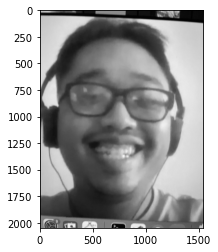

In [ ]:
# a vectorized numpy version of your implementation
def gray(src,dst):
    for i in range(src.shape[0]):
      # g = np.uint8(src[i][0]*0.33 + src[i][1]*0.33 + src[i][2]*0.33)
      g = np.uint8((src[i][0] + src[i][1] + src[i][2])/3)
      # print('g ', g)
      dst[i][0] = dst[i][1] = dst[i][2] = g

# image[:,:,0]*0.21+image[:,:,1]*0.72 + image[:,:,2]*0.07

img = matplotlib.image.imread('test.jpg')
print(img.shape)
image = img.reshape(imageWidth*imageHeight,3)

import matplotlib.pyplot as plt

start = time.time()
out = np.zeros((imageHeight*imageWidth, 3),np.uint8)  # This make the sum doesn't work. zeros by default use float  

gray(image,out)

out = out.reshape((imageHeight,imageWidth, 3))

end = time.time()
print("Processing time: ", end - start)
print(out.shape)
imgplot = plt.imshow(out)
plt.show()

In [ ]:


test_arr = np.array (
    [[
        [1,2,3],
        [4,5,6],
        
    ],
    [
        [11,22,33],
        [44,55,66],
        
    ],
    [
        [1,2,3],
        [4,5,6],
        
    ],
     [
        [1,2,3],
        [4,5,6],
        
    ]]
)
def gray(src,dst):
    for i in range(src.shape[0]):
      g = np.uint8((src[i][0] + src[i][1] + src[i][2]))
      # print('g ', g)
      dst[i][0] = dst[i][1] = dst[i][2] = g
def grayQuick(image: np.array) -> np.array:
    return np.tile(
        np.expand_dims(
            (image[:,:,0]+image[:,:,1] + image[:,:,2]), -1
        ),
        (1,1, 3)
    )

test_arr_ori = test_arr.copy()
print(test_arr.shape)

test_arr = test_arr.reshape(test_arr.shape[0]*test_arr.shape[1],3)

out = np.zeros((test_arr_ori.shape[0]*test_arr_ori.shape[1], 3),np.uint8)    

gray(test_arr,out)

out_ = grayQuick(test_arr_ori)

out = out.reshape((test_arr_ori.shape[0], test_arr_ori.shape[1], 3))
out_ = out_.reshape((test_arr_ori.shape[0], test_arr_ori.shape[1], 3))

print(out)
print(out.shape)
print(out_)
print(out_.shape)

(4, 2, 3)
[[[  6   6   6]
  [ 15  15  15]]

 [[ 66  66  66]
  [165 165 165]]

 [[  6   6   6]
  [ 15  15  15]]

 [[  6   6   6]
  [ 15  15  15]]]
(4, 2, 3)
[[[  6   6   6]
  [ 15  15  15]]

 [[ 66  66  66]
  [165 165 165]]

 [[  6   6   6]
  [ 15  15  15]]

 [[  6   6   6]
  [ 15  15  15]]]
(4, 2, 3)


Processing time:  0.09525203704833984


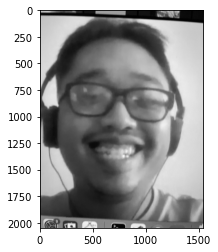

In [ ]:
# a vectorized numpy version of your implementation
def grayQuick(image: np.array) -> np.array:
    return np.tile(
        np.expand_dims(
            (image[:,:,0]*0.21+image[:,:,1]*0.72 + image[:,:,2]*0.07), -1
        ),
        (1,1, 3)
    )


img = matplotlib.image.imread('test.jpg')


import matplotlib.pyplot as plt

start = time.time()
out = grayQuick(img)
out = out.reshape((imageHeight, imageWidth,3)).astype('int')

end = time.time()
print("Processing time: ", end - start)

imgplot = plt.imshow(out)
plt.show()